# Machine Learning Demo


## 1. Breast Cancer Diagnosis Machine Learning Classification 



The dataset we wis the **Breast Cancer Wisconsin (Prognostic) Data Set** from UCI Machine Learning Repository. More details about the datasets can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29)


(1) Download the dataset from Canvas (`Files/homeworks/homework6/breast_cancer_dataset.csv`)

* Result: Downloaded breast cancer file uploaded to gdrive.

(2) Read the CSV file using Pandas and divide the dataframe into a feature matrix dataset and outcome variable. Here the outcome variable is contained the column `diagnosis_label` (0 indicates benign tumor and 1 implies a malignant tumor diagnosis). All other columns (30) are features that should be used to train ML models.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [4]:
breastCancer_file="/content/drive/MyDrive/HIDS6001/breast_cancer_dataset.csv"
breastCancer_df=pd.read_csv(breastCancer_file)
breastCancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [5]:
# Separation into feature & outcome.
X_df=breastCancer_df.drop('diagnosis_label', axis=1)
y_df=breastCancer_df['diagnosis_label']
X_df.shape, y_df.shape

((569, 30), (569,))

(3) Split the dataset into training and test sets. Use a 70:30 split i.e. you should train on 70% of the data and test on 30% of the data.  Print how outcome label distribution (how many malignant and benign) in your train and test set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=2)
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
166,10.80,9.71,68.77,357.6,0.09594,0.05736,0.025310,0.016980,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.1436,0.12570,0.104700,0.04603,0.2090,0.07699
384,13.28,13.72,85.79,541.8,0.08363,0.08575,0.050770,0.028640,0.1617,0.05594,...,14.24,17.37,96.59,623.7,0.1166,0.26850,0.286600,0.09173,0.2736,0.07320
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.037360,0.1454,0.06147,...,15.48,27.27,105.90,733.5,0.1026,0.31710,0.366200,0.11050,0.2258,0.08004
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.165500,0.090630,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.1528,0.18450,0.397700,0.14660,0.2293,0.06091
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418


In [7]:
y_train.head()

166    0
384    0
558    0
451    1
333    0
Name: diagnosis_label, dtype: int64

In [8]:
print(Counter(y_train)) # 253 benign, 145 malignant
print(Counter(y_test)) # 104 benign, 67 malignant

Counter({0: 253, 1: 145})
Counter({0: 104, 1: 67})


(4) Train any two ML classifiers (Logistic Regression, SVM, Random Forest) that you learned in lecture 8 on the training set.
* Selected classifiers: SVM & Logistic Regression

(4-1) SVM classifier

In [9]:
# Fit/train model on train set
model = svm.SVC(probability=True)
model.fit(X_train, y_train)

# Generate predictions
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

(array([88.,  8.,  2.,  4.,  3.,  4.,  1.,  5.,  2., 54.]),
 array([0.01003893, 0.10903504, 0.20803114, 0.30702724, 0.40602335,
        0.50501945, 0.60401555, 0.70301166, 0.80200776, 0.90100386,
        0.99999997]),
 <BarContainer object of 10 artists>)

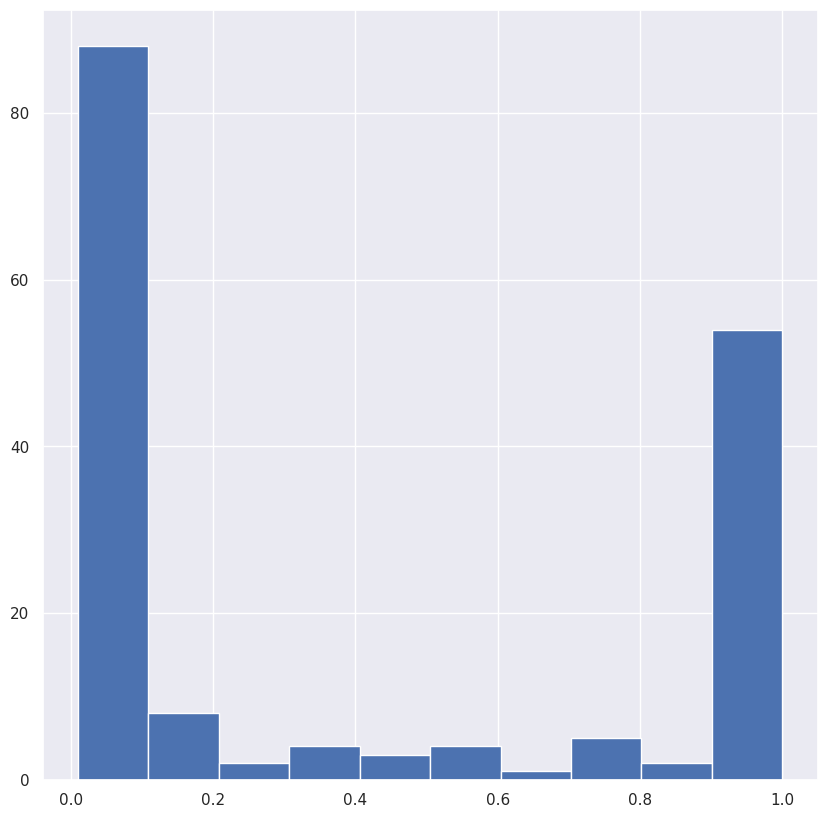

In [10]:
predictions_proba = model.predict_proba(X_test)
plt.hist(predictions_proba[:,1])

(4-2) Logistic Regression

In [11]:
# Fit/train model on train set
modelLR = LogisticRegression(max_iter=500)
modelLR.fit(X_train, y_train)

# Generate predictions
predictionsLR = modelLR.predict(X_test)
predictionsLR

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

(array([90.,  8.,  4.,  1.,  0.,  5.,  2.,  0.,  2., 59.]),
 array([2.27586042e-05, 1.00020483e-01, 2.00018207e-01, 3.00015931e-01,
        4.00013655e-01, 5.00011379e-01, 6.00009103e-01, 7.00006828e-01,
        8.00004552e-01, 9.00002276e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

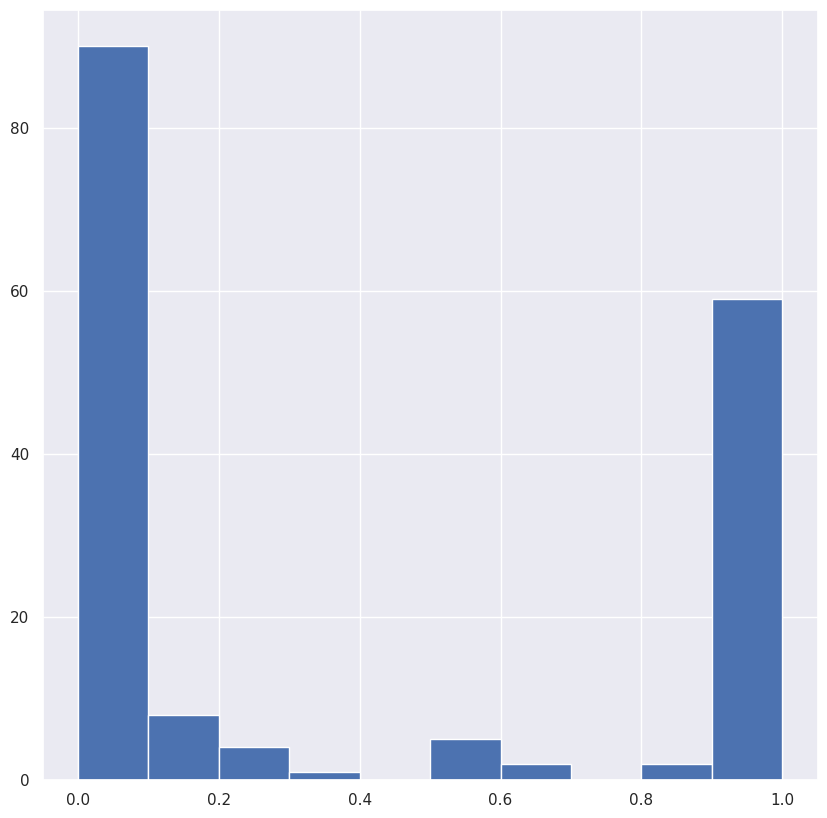

In [12]:
predictions_probaLR = modelLR.predict_proba(X_test)
plt.hist(predictions_probaLR[:,1])

(5) Evaluated the performance of each trained ML model on the test set and print (1) Evaluation metrics such as precision, recall and F1-score,

(5-1) SVM Classifier

In [13]:
cm=confusion_matrix(y_test, predictions)
cm

array([[100,   4],
       [ 11,  56]])

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

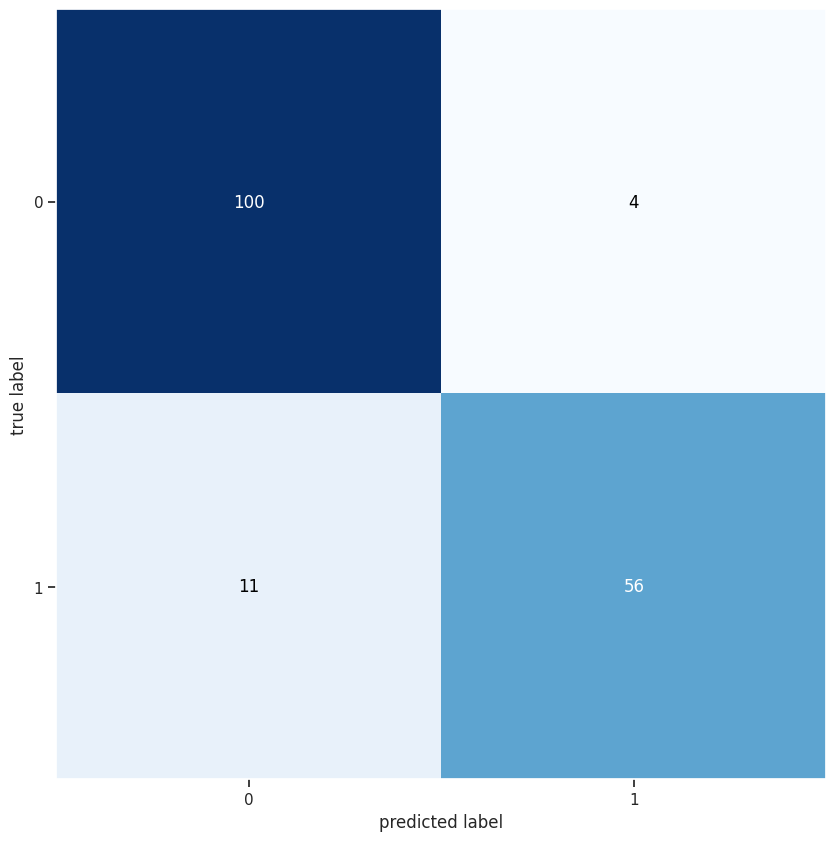

In [14]:
plot_confusion_matrix(conf_mat=cm, show_absolute=True)

In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(100, 4, 11, 56)

* Evaluation values

In [17]:
#Accuracy
accuracy = (tp+tn)/(tp+tn+fp+fn)
print('SVM Accuracy: %.3f' % accuracy)

#Recall/Sensitivity/True Positive rate
recall = sensitivity = tpr = tp / (tp + fn)
print('SVM Recall: %.3f' % recall)

#Precision
precision = tp / (tp + fp)
print('SVM Precision: %.3f' % precision)

#Specificity/Negative Recall/ True negative Rate/ 1-False Positive Rate
specificity = tn / (tn + fp)
print('SVM Specificity: %.3f' % specificity)

#F1 Score
f1 = 2*(precision*recall)/(precision+recall)
print('SVM F1: %.3f' % f1)

SVM Accuracy: 0.912
SVM Recall: 0.836
SVM Precision: 0.933
SVM Specificity: 0.962
SVM F1: 0.882


* Classification report

In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       104
           1       0.93      0.84      0.88        67

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



(5-2) Logistic Regression

In [19]:
cmLR=confusion_matrix(y_test, predictionsLR)
cmLR

array([[98,  6],
       [ 5, 62]])

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

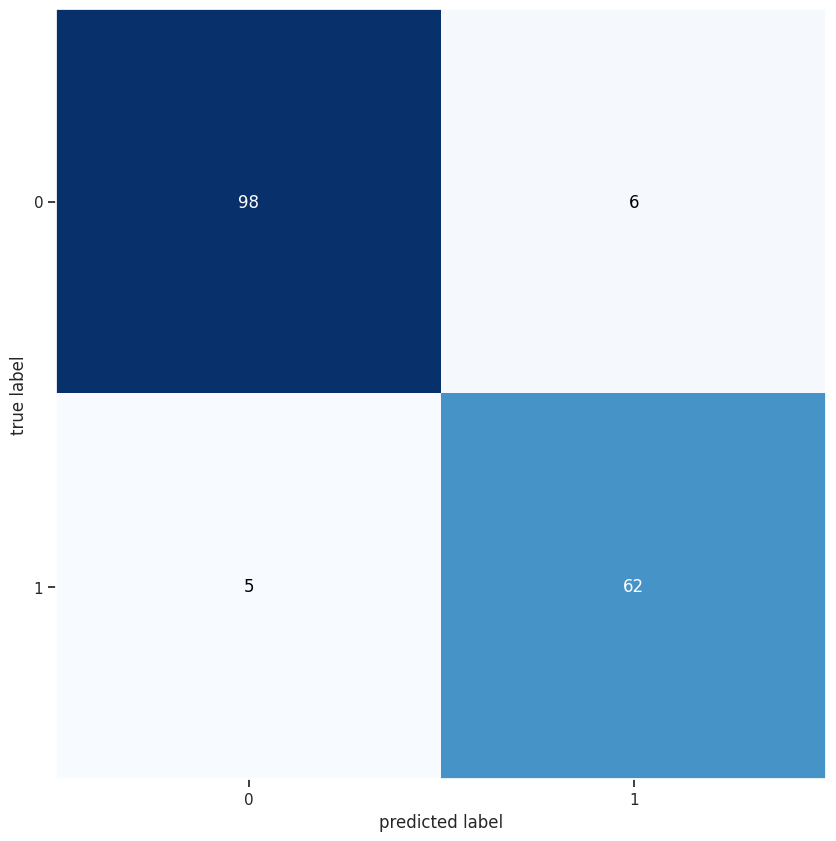

In [20]:
plot_confusion_matrix(conf_mat=cmLR, show_absolute=True)

In [21]:
tnLR, fpLR, fnLR, tpLR = confusion_matrix(y_test, predictionsLR).ravel()
tnLR, fpLR, fnLR, tpLR

(98, 6, 5, 62)

* Evaluation Values

In [23]:
#Accuracy
accuracyLR = (tpLR+tnLR)/(tpLR+tnLR+fpLR+fnLR)
print('Logistc Regression Accuracy: %.3f' % accuracyLR)

#Recall/Sensitivity/True Positive rate
recallLR = sensitivityLR = tprLR = tpLR / (tpLR + fnLR)
print('Logistc Regression Recall: %.3f' % recallLR)

#Precision
precisionLR = tpLR / (tpLR + fpLR)
print('Logistc Regression Precision: %.3f' % precisionLR)

#Specificity/Negative Recall/ True negative Rate/ 1-False Positive Rate
specificityLR = tnLR / (tnLR + fpLR)
print('Logistc Regression Specificity: %.3f' % specificityLR)

#F1 Score
f1LR = 2*(precisionLR*recallLR)/(precisionLR+recallLR)
print('Logistc Regression F1: %.3f' % f1LR)

Logistc Regression Accuracy: 0.936
Logistc Regression Recall: 0.925
Logistc Regression Precision: 0.912
Logistc Regression Specificity: 0.942
Logistc Regression F1: 0.919


* Classification Report

In [24]:
print(classification_report(y_test, predictionsLR))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       104
           1       0.91      0.93      0.92        67

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

